In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
deg_to_rad = np.pi/180.0
rad_to_deg = 180.0/np.pi

m1 = 1.672E-27
m2 = m1

v1 = 3.10E6
v2 = 0

theta1 = 0.0*deg_to_rad
theta2 = 0.0*deg_to_rad
theta3 = 76.0*deg_to_rad

a = m2**2
b = m1*v1*np.cos(theta1)+m2*v2*np.cos(theta2)
c = m1*np.cos(theta3)
e = m1*v1*np.sin(theta1)+m2*v2*np.sin(theta2)
f = m1*np.sin(theta3)
g = (m1*v1**2+m2*v2**2)/m1
h = m2/m1

nsteps = 100000
for i in range(nsteps):
    v4 = v1*(i+1)/nsteps
    value = -a + ((b-c*np.sqrt(g-h*v4**2))/v4)**2 + ((e-f*np.sqrt(g-h*v4**2))/v4)**2
    #print (v4,value)
    if (value<0):
        break
        
v3 = np.sqrt(g-h*v4**2)
        
print ("v3 = %0.1f, v4 = %0.1f" %(v3,v4) )

v3 = 749904.7, v4 = 3007930.0


In [90]:
KE1_initial = 0.5*m1*v1**2
KE1_final = 0.5*m1*v3**2

fraction = KE1_final/KE1_initial

print ("fraction of m1 kinetic energy = %0.2f" % fraction)

fraction of m1 kinetic energy = 0.06


In [91]:
m1 = 1.672E-27
m2 = m1

v1 = 3.10E6
v2 = 0
tmax = 180.0

theta1 = 0.0*deg_to_rad
theta2 = 0.0*deg_to_rad
theta3 = np.zeros(179)
theta3d = np.zeros(179)
theta4 = np.zeros(179)
theta4d = np.zeros(179)
v4a = np.zeros(179)
v3a = np.zeros(179)
sin_theta_plus_phi = np.zeros(179)

flag2 = True
for i in range(179):
    theta3[i] = (1.0+i)*deg_to_rad
    theta3d[i] = (1.0+i)
    a = m2**2
    b = m1*v1*np.cos(theta1)+m2*v2*np.cos(theta2)
    c = m1*np.cos(theta3[i])
    e = m1*v1*np.sin(theta1)+m2*v2*np.sin(theta2)
    f = m1*np.sin(theta3[i])
    g = (m1*v1**2+m2*v2**2)/m1
    h = m2/m1

    nsteps = 1000
    flag = False
    for j in range(nsteps):
        v4 = v1*(j+1)/nsteps
        value = -a + ((b-c*np.sqrt(g-h*v4**2))/v4)**2 + ((e-f*np.sqrt(g-h*v4**2))/v4)**2
        if (value<0):
            flag = True
            break

    if flag:
        v3a[i] = np.sqrt(g-h*v4**2)
        v4a[i] = v4
    
        theta4[i]=np.arctan((e-f*v3a[i])/(b-c*v3a[i]))
        theta4d[i]=theta4[i]*rad_to_deg
        
        sin_theta_plus_phi[i] = 2.0*v3a[i]*v4a[i]/(v1**2)
    else:
        if flag2:
            tmax = theta3d[i]
            flag2 = False

(0.0, 88.0)

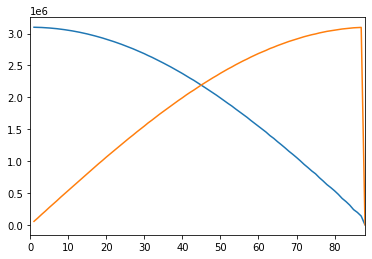

In [92]:
plt.plot(theta3d,v3a)
plt.plot(theta3d,v4a)
plt.xlim(0,tmax)

(0.0, 88.0)

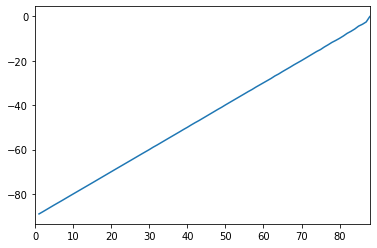

In [93]:
plt.plot(theta3d,theta4d)
plt.xlim(0,tmax)

(0.0, 88.0)

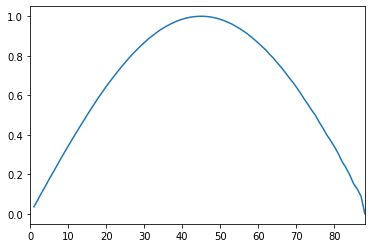

In [94]:
plt.plot(theta3d,sin_theta_plus_phi)
plt.xlim(0,tmax)